Dataset3: House price Prediction Dataset

Load Data and Write script to perform following operations.

Task 1: Consider the above data and perform preprocessing. 
 

In this task,we will first add all necessary libraries,after that we will do all the preprocessing work for cleaning our data...for preprocessing we can use mean for filling the missing values and filling the categorical data with the mode values...and encoding the categorical data for converting it to the numerical data...also printing the first five lines.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('Housing.csv')

# Handle missing values (if any)
print("Missing values before cleaning:")
print(data.isnull().sum())  # Check for missing values

# Fill missing values in numerical columns with the mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Replace NaN with mean for numerical

# Fill missing values in categorical columns with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Replace NaN with mode for categorical

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Check the data after preprocessing
print(data.head())

Missing values before cleaning:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0    

Task 2: Perform basic EDA for data analysis.


In this task, we will do the proper EDA which means Exploratory Data Analysis...from which we will find the insights of our data and also we will get to know the correlations of two different features with each other using the correlation heatmap.

By setting kde=True in sns.histplot, you're instructing Seaborn to add the KDE curve to your histogram. This curve provides a visual representation of the underlying distribution of the 'charges' data.

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

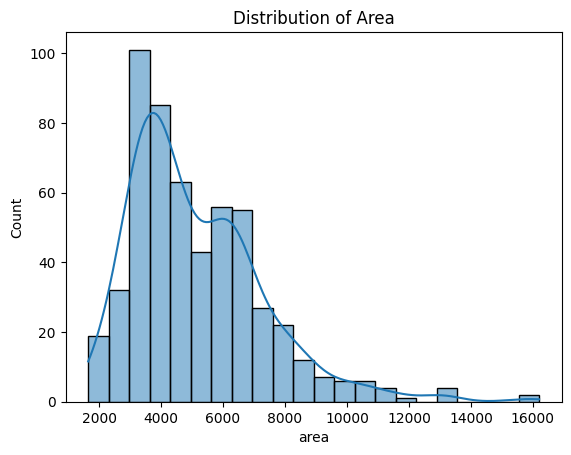

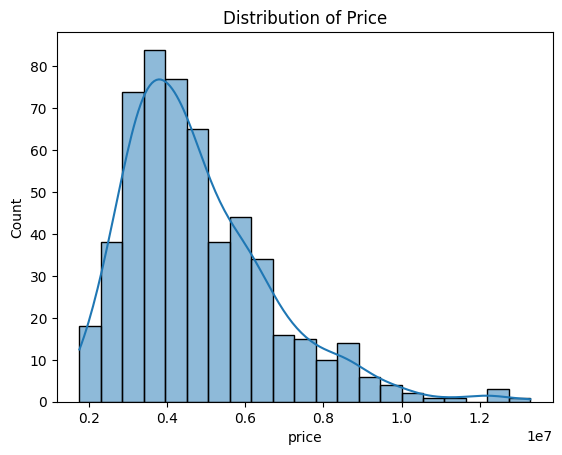

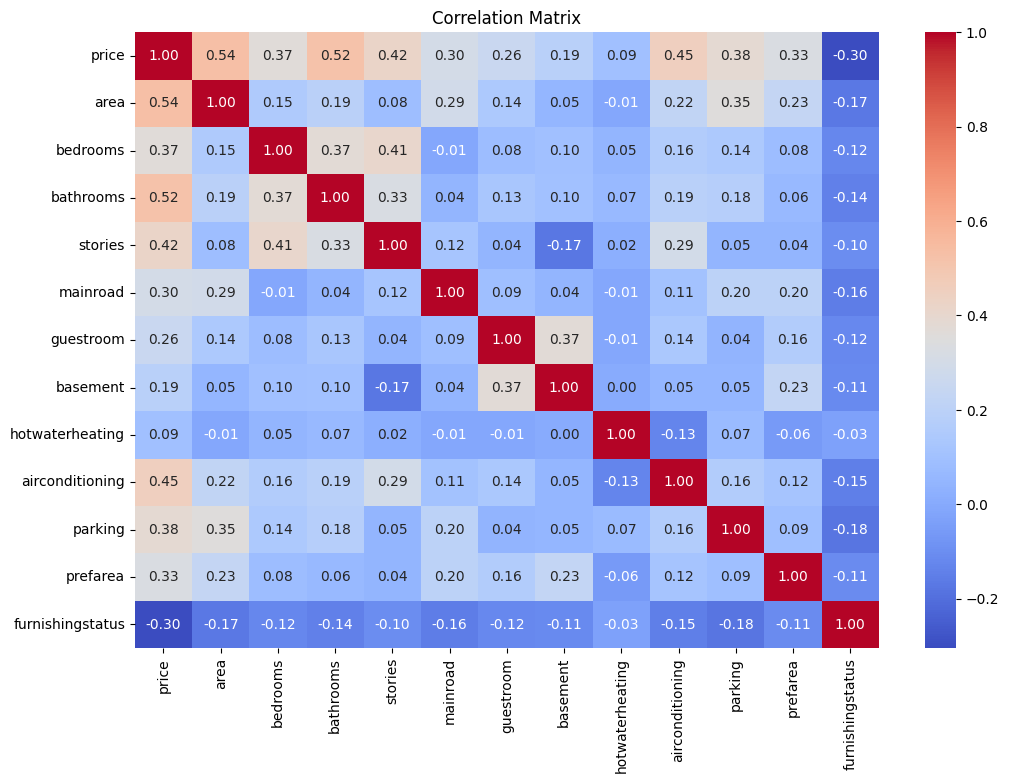

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying descriptive statistics
print(data.describe())

# Visualizing the distribution of area and price
sns.histplot(data['area'], kde=True)
plt.title('Distribution of Area')
plt.show()

sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix
corr_matrix = data.corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Using pairplot for getting all the graphs of area

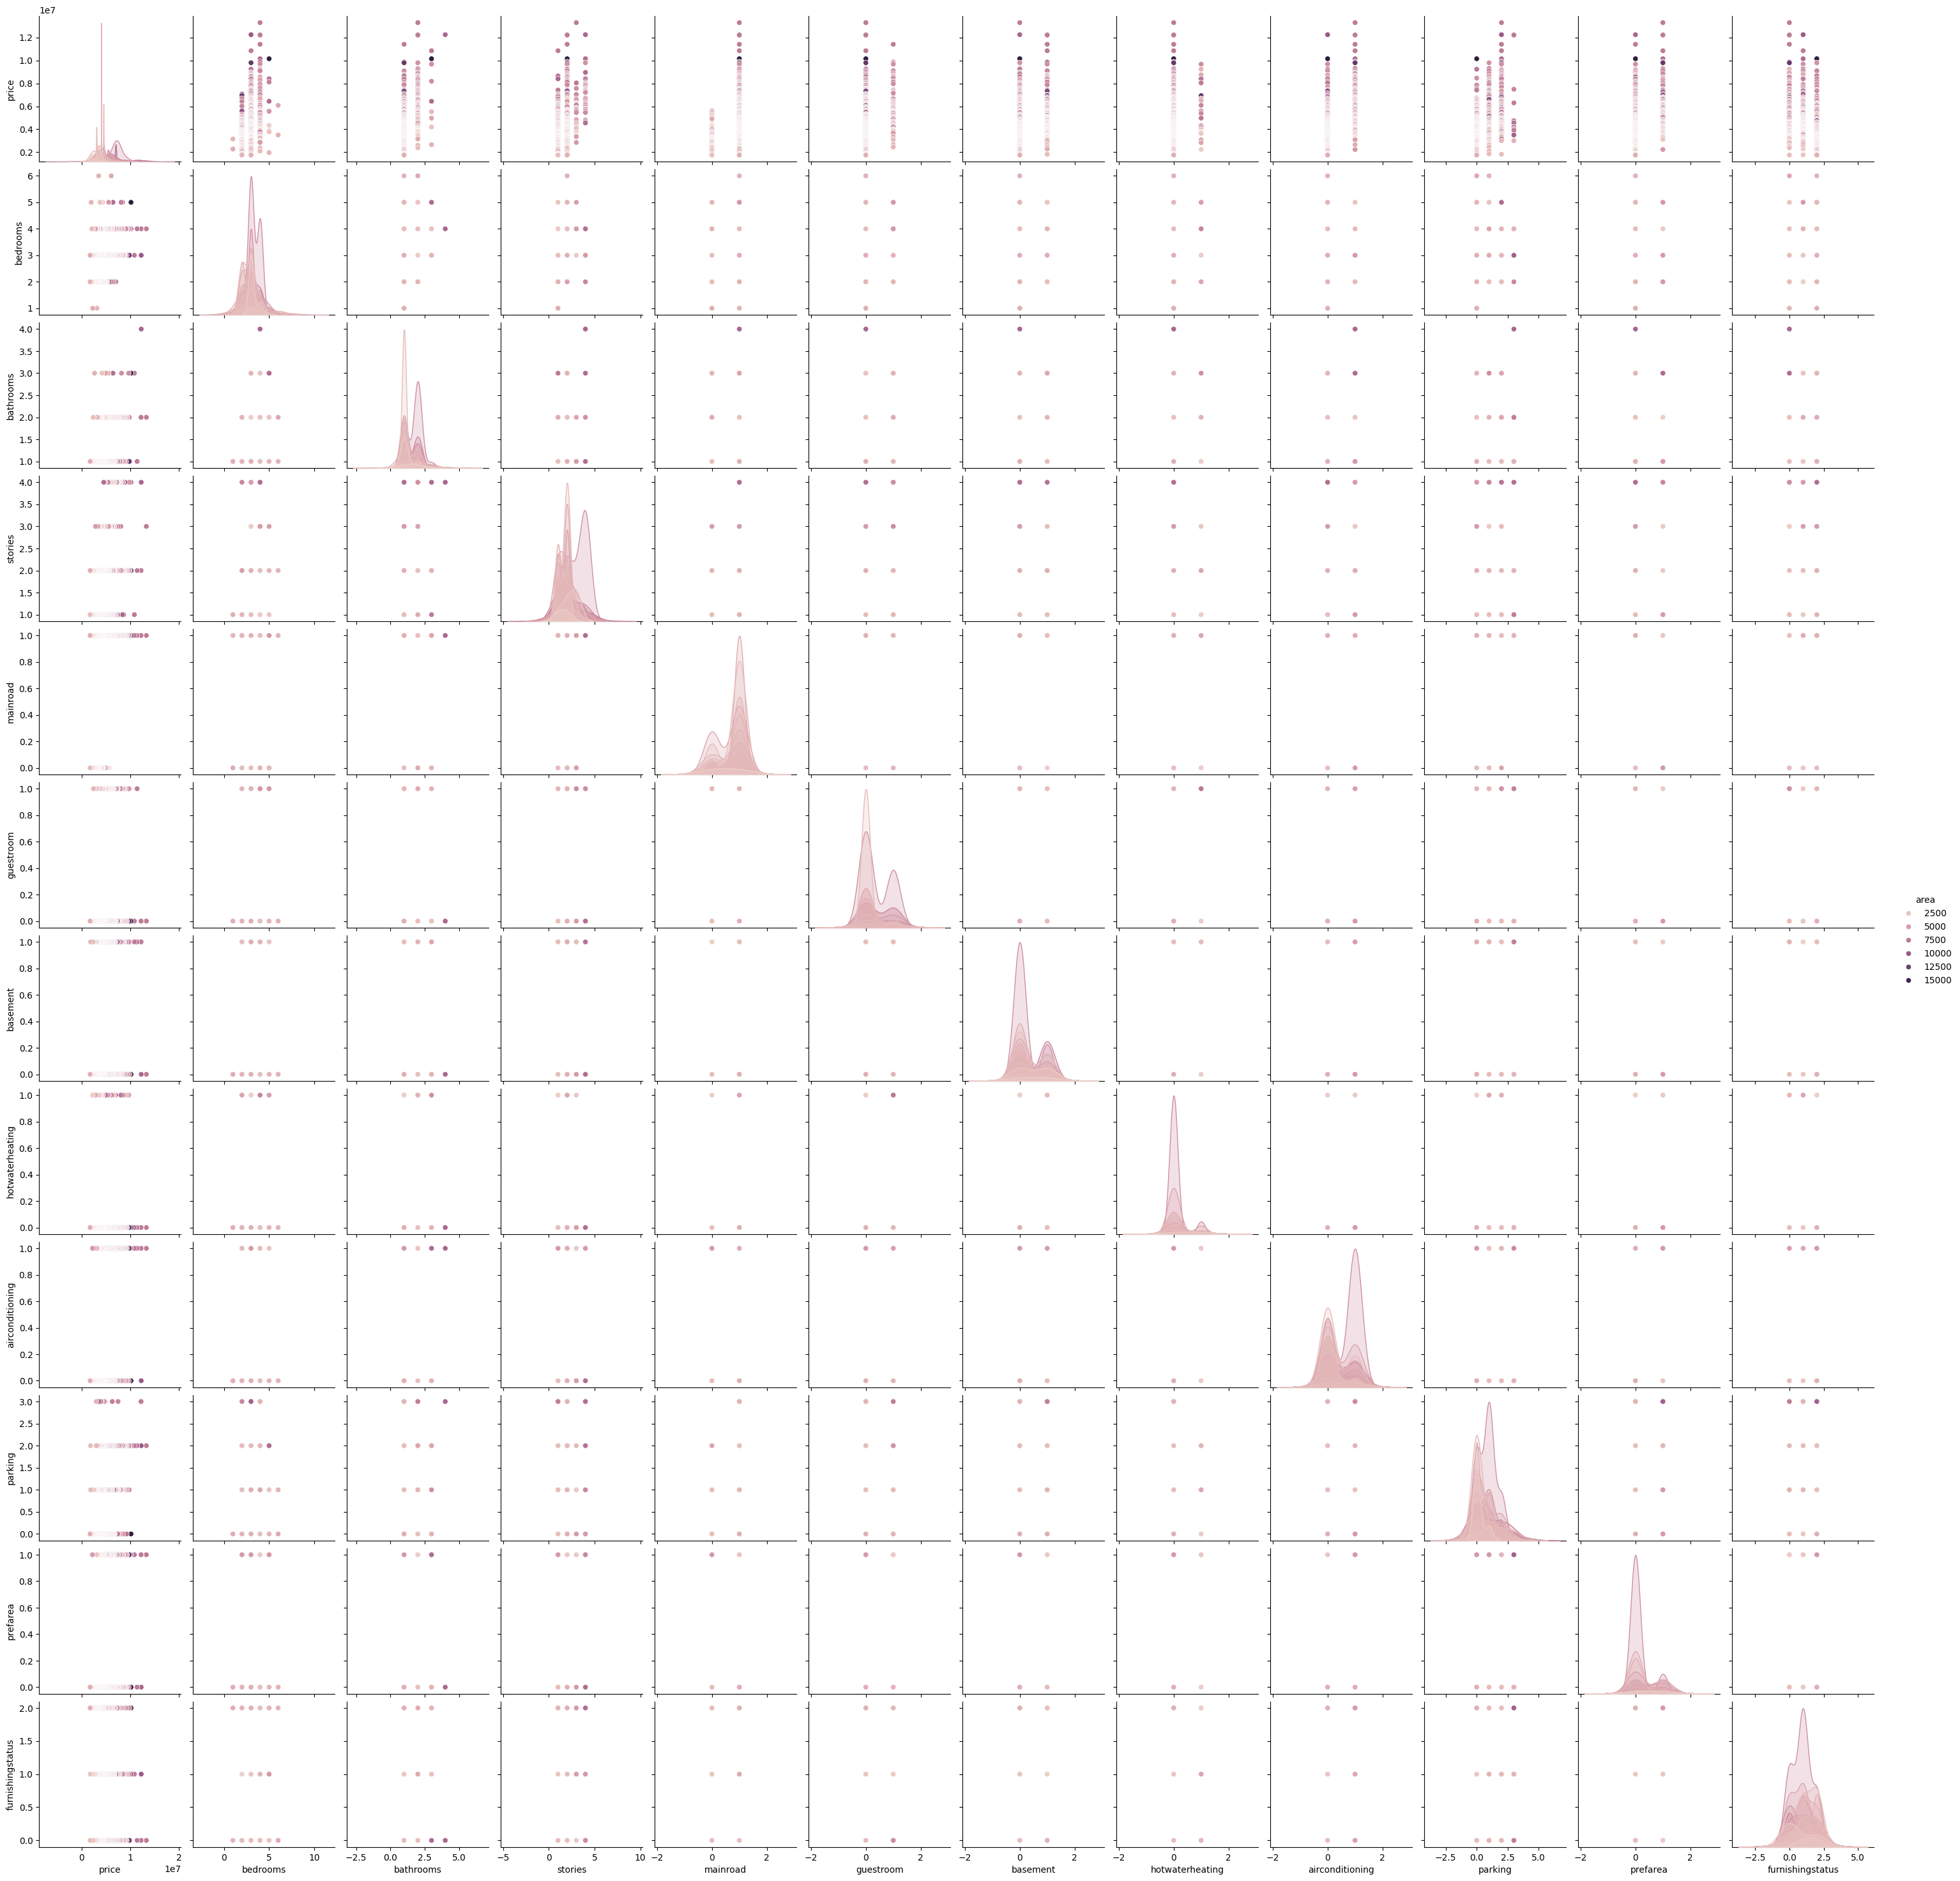

In [3]:
sns.pairplot(data, hue='area', diag_kind='kde')
plt.show()

Task 3: Perform feature engineering to select appropriate features.


Using above heatmap we get to know that the we can choose price as the target variable and we can choose all other features other than price as the feature variables as there correlations are greater than all other features.

In [4]:
# Select relevant features (in this case, we'll use all numerical columns)
X = data.drop('price', axis=1)  # All columns except the target variable
y = data['price']  # The target variable (price)

from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Check the shape of the splits
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')


(436, 12) (109, 12) (436,) (109,)
Training set size: (436, 12)
Test set size: (109, 12)


Task 4: Construct multiple linear regression model


Using Multiple linear regression because we have selected all other features other than target feature as input and one target variable.

In [5]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Predict on the test data
y_pred = model.predict(X_test)

# Display model coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Model intercept: 293083.0691506723


Model Coefficients
The array [2.35848772e+02, 7.85744924e+04, ...] represents the coefficients of the independent variables (features) in your regression model.
Each coefficient indicates the impact of a one-unit increase in the corresponding independent variable on the dependent variable, assuming all other variables remain constant.
For example, if the second coefficient is 7.85744924e+04 (or 78574.49 in standard notation), a one-unit increase in the second independent variable increases the predicted value by 78574.49 units.

The intercept is 293083.0691506723.
It represents the predicted value of the dependent variable when all independent variables are zero. In simpler terms, it's the baseline value of the model.

Task 5: Evaluate the model with appropriate metrics


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

#Calculate rmse
rmse = np.sqrt(mse)

#Calculate mae
mae = mean_absolute_error(y_test, y_pred)

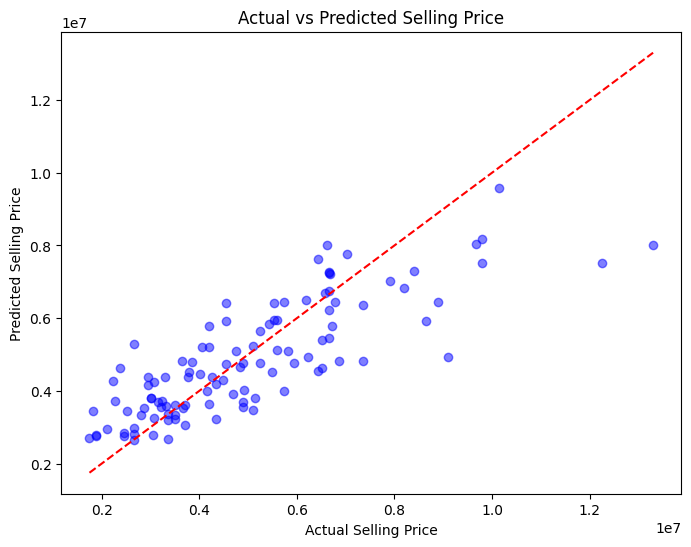

In [8]:
# Plot the actual vs predicted selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()



The closer the blue dots are to the red Ideal Line,the better the model's predictions.  Closer points indicate that the predicted Price are close to the Price.

Task 6: Generate the results

In [9]:
# Display the results in a clean format
print("\n### Model Evaluation Results ###")
print("\nMultiple Linear Regression Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R²): {r2:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")


### Model Evaluation Results ###

Multiple Linear Regression Model:
- Mean Squared Error (MSE): 1771751116594.03
- R-squared (R²): 0.65
- Root Mean Squared Error (RMSE): 1331071.42
- Mean Absolute Error (MAE): 979679.69


Mean Squared Error (MSE): 1,771,751,116,594.03

This is a large value, indicating that the model's predictions have considerable squared error. However, since MSE is sensitive to scale, its interpretation depends on the units of the dependent variable.

R-squared (R²): 0.65

The model explains 65% of the variance in the dependent variable based on the independent variables.
While this indicates a moderate fit, there’s room for improvement, as 35% of the variability is still unexplained.

Root Mean Squared Error (RMSE): 1,331,071.42

RMSE gives the average error magnitude in the same units as the dependent variable.
This large error suggests that the model predictions deviate significantly from the actual values on average.

Mean Absolute Error (MAE): 979,679.69

On average, the model's predictions are off by approximately 979,679 units.
Unlike RMSE, MAE does not heavily penalize large errors, so it provides a less sensitive error metric.